# <center> Homework Assignment 1 </center>

### Import packages

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import the matplotlib plotting library

### Navigate to directory with data

In [7]:
pwd

'/Users/laurenheintz/Docs/MSDS/Sp2020/DATA515/HW1/homework-1-manipulating-data-lheintz/project/data'

In [8]:
%cd /Users/laurenheintz/Docs/MSDS/Sp2020/DATA515/HW1/homework-1-manipulating-data-lheintz/project/data

/Users/laurenheintz/Docs/MSDS/Sp2020/DATA515/HW1/homework-1-manipulating-data-lheintz/project/data


In [9]:
pwd

'/Users/laurenheintz/Docs/MSDS/Sp2020/DATA515/HW1/homework-1-manipulating-data-lheintz/project/data'

### Read in data

In [14]:
bikeData = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv')
bikeData.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


### Add additional columns for Total, Year, and Hour

In [15]:
bikeData['Date'] = pd.to_datetime(bikeData['Date'])
bikeData['Total East West'] = bikeData['Fremont Bridge East Sidewalk'] + bikeData['Fremont Bridge West Sidewalk']
bikeData['Year'] = pd.DatetimeIndex(bikeData['Date']).year
bikeData['Hour'] = pd.DatetimeIndex(bikeData['Date']).hour
bikeData.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total East West,Year,Hour
0,2012-10-03 00:00:00,13.0,4.0,9.0,13.0,2012,0
1,2012-10-03 01:00:00,10.0,4.0,6.0,10.0,2012,1
2,2012-10-03 02:00:00,2.0,1.0,1.0,2.0,2012,2
3,2012-10-03 03:00:00,5.0,2.0,3.0,5.0,2012,3
4,2012-10-03 04:00:00,7.0,6.0,1.0,7.0,2012,4


In [17]:
bikeData.dtypes

Date                            datetime64[ns]
Fremont Bridge Total                   float64
Fremont Bridge East Sidewalk           float64
Fremont Bridge West Sidewalk           float64
Total East West                        float64
Year                                     int64
Hour                                     int64
dtype: object

### Create subset for year 2016

In [19]:
# Set mask
mask = (bikeData['Year'] == 2016)

# Subset
bikeData16 = bikeData.loc[mask]
bikeData16

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total East West,Year,Hour
28440,2016-01-01 00:00:00,18.0,9.0,9.0,18.0,2016,0
28441,2016-01-01 01:00:00,15.0,3.0,12.0,15.0,2016,1
28442,2016-01-01 02:00:00,11.0,6.0,5.0,11.0,2016,2
28443,2016-01-01 03:00:00,7.0,1.0,6.0,7.0,2016,3
28444,2016-01-01 04:00:00,2.0,0.0,2.0,2.0,2016,4
...,...,...,...,...,...,...,...
37219,2016-12-31 19:00:00,10.0,6.0,4.0,10.0,2016,19
37220,2016-12-31 20:00:00,9.0,3.0,6.0,9.0,2016,20
37221,2016-12-31 21:00:00,10.0,4.0,6.0,10.0,2016,21
37222,2016-12-31 22:00:00,15.0,7.0,8.0,15.0,2016,22


### Plot Data

In [77]:
count_by_hour = bikeData.groupby(['Hour']).sum()['Total East West']

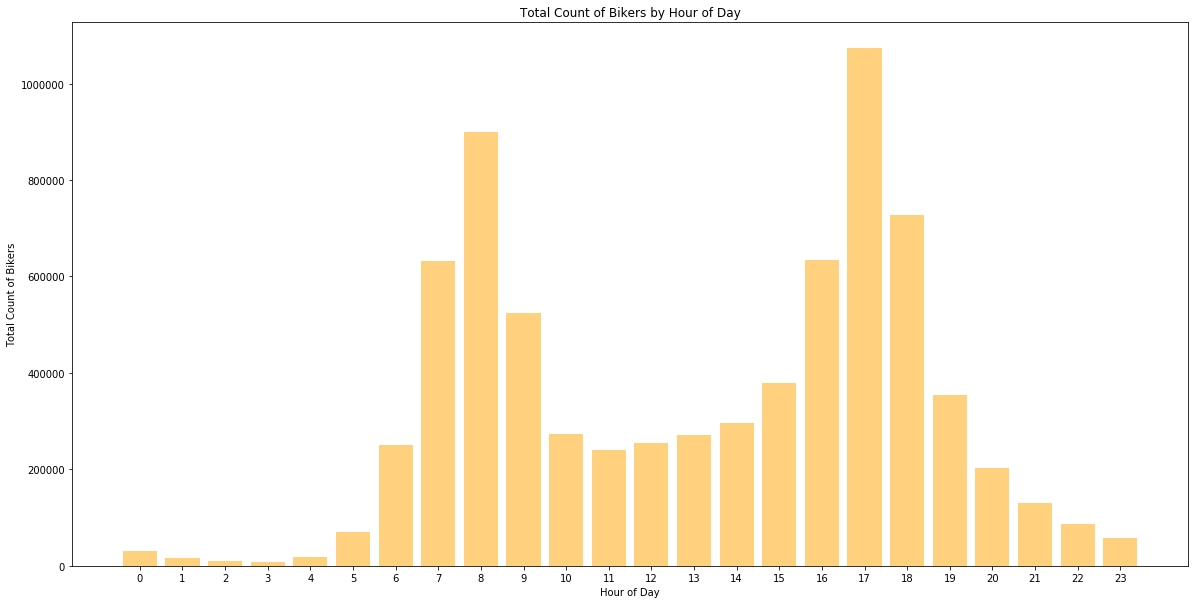

In [78]:
# set up axis and fig size
fig, ax = plt.subplots(figsize=(20, 10))

# Set up x and y axis data
y_pos = np.arange(len(count_by_hour))
total_counts = count_by_hour.values

# Plot
plt.bar(y_pos, total_counts, align='center', alpha = .5, color = 'orange')

# Format
plt.xticks(y_pos)
plt.ylabel('Total Count of Bikers')
plt.xlabel('Hour of Day')
plt.title('Total Count of Bikers by Hour of Day')
plt.show()

### Find busiest day on average

In [80]:
mean_by_hour = bikeData.groupby(['Hour']).mean()['Total East West']

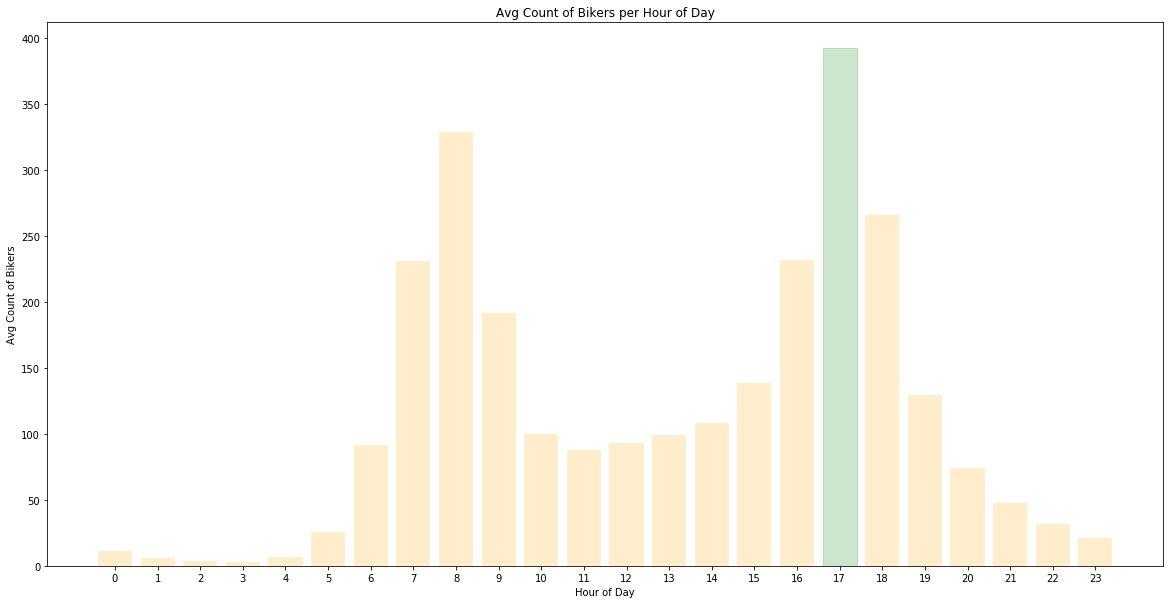

In [93]:
# set up axis and fig size
fig, ax = plt.subplots(figsize=(20, 10))

# Set up x and y axis data
y_pos = np.arange(len(mean_by_hour))
means = mean_by_hour.values

# Plot
chart = plt.bar(y_pos, means, align='center', alpha = .2, color = 'orange')
ax.get_children()[17].set_color('green')

# Format
plt.xticks(y_pos)
plt.ylabel('Avg Count of Bikers')
plt.xlabel('Hour of Day')
plt.title('Avg Count of Bikers per Hour of Day')
plt.show()

### As we can see, the busiest hour of the day on average is 5pm-6pm!